In [1]:
import zipfile
import os

# paths
zip_path = "train.zip"
extract_path = "train_raw"

# extract
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Train zip extracted!")

Train zip extracted!


In [20]:
import os

In [2]:
base_dir = "train"

cats_dir = os.path.join(base_dir, "cats")
dogs_dir = os.path.join(base_dir, "dogs")

os.makedirs(cats_dir, exist_ok=True)
os.makedirs(dogs_dir, exist_ok=True)

print("Cats & Dogs folders created!")

Cats & Dogs folders created!


In [3]:
import os
import shutil

source_dir = os.path.join("train_raw", "train")

for file_name in os.listdir(source_dir):
    if file_name.lower().startswith("cat"):
        shutil.move(
            os.path.join(source_dir, file_name),
            os.path.join(cats_dir, file_name)
        )
    elif file_name.lower().startswith("dog"):
        shutil.move(
            os.path.join(source_dir, file_name),
            os.path.join(dogs_dir, file_name)
        )

print("Images moved into cats and dogs folders!")


Images moved into cats and dogs folders!


In [4]:
cats_dir = "train/cats"
dogs_dir = "train/dogs"

num_cats = len(os.listdir(cats_dir))
num_dogs = len(os.listdir(dogs_dir))

print("Total Cat images:", num_cats)
print("Total Dog images:", num_dogs)

Total Cat images: 12500
Total Dog images: 12500


In [5]:
print("Sample Cat Images:")
print(os.listdir(cats_dir)[:5])

print("\nSample Dog Images:")
print(os.listdir(dogs_dir)[:5])


Sample Cat Images:
['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg']

Sample Dog Images:
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg']


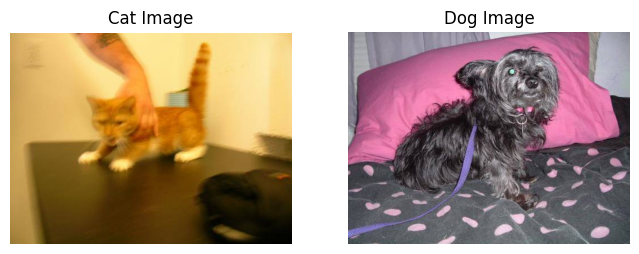

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

# load images
cat_img = Image.open(os.path.join(cats_dir, os.listdir(cats_dir)[0]))
dog_img = Image.open(os.path.join(dogs_dir, os.listdir(dogs_dir)[0]))

# plot
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(cat_img)
plt.title("Cat Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(dog_img)
plt.title("Dog Image")
plt.axis("off")

plt.show()


In [7]:
print("Cat image size:", cat_img.size)
print("Dog image size:", dog_img.size)

Cat image size: (500, 374)
Dog image size: (499, 375)


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
IMG_SIZE = 224
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    directory="train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    directory="train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)
print("train_data exists:", 'train_data' in locals())
print(train_data.class_indices)
print("Train batches:", len(train_data))
print("Validation batches:", len(val_data))


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
train_data exists: True
{'cats': 0, 'dogs': 1}
Train batches: 625
Validation batches: 157


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# 1️⃣ Convolution Layer
model.add(
    Conv2D(
        32,
        (3, 3),
        activation='relu',
        input_shape=(224, 224, 3)
    )
)

# 2️⃣ Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3️⃣ Convolution Layer
model.add(
    Conv2D(
        64,
        (3, 3),
        activation='relu'
    )
)

# 4️⃣ Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# 5️⃣ Flatten
model.add(Flatten())

# 6️⃣ Fully Connected Layer
model.add(Dense(128, activation='relu'))

# 7️⃣ Output Layer
model.add(Dense(1, activation='sigmoid'))

# Compile
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#model.summary()


In [14]:
EPOCHS = 10

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS
)


Epoch 1/10


c:\Users\sarfr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 1111s 2s/step - accuracy: 0.5980 - loss: 0.8871 - val_accuracy: 0.7058 - val_loss: 0.5683
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 419s 670ms/step - accuracy: 0.7469 - loss: 0.5110 - val_accuracy: 0.7648 - val_loss: 0.4994
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 378s 605ms/step - accuracy: 0.8250 - loss: 0.3931 - val_accuracy: 0.7768 - val_loss: 0.4790
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 534s 853ms/step - accuracy: 0.8902 - loss: 0.2598 - val_accuracy: 0.7748 - val_loss: 0.5394
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 907s 1s/step - accuracy: 0.9511 - loss: 0.1339 - val_accuracy: 0.7842 - val_loss: 0.7476
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 898s 1s/step - accuracy: 0.9789 - loss: 0.0629 - val_accuracy: 0.7724 - val_loss: 0.8853
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 351s 560ms/step - accuracy: 0.9885 - loss: 0.0393 - val_accuracy: 0.7604 - val_loss: 1.1057
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 350s 560ms/step - accuracy: 0.9914 - loss: 0.0302 - val

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model_phase2 = Sequential()

# Convolution Block 1
model_phase2.add(Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)))
model_phase2.add(MaxPooling2D((2,2)))

# Convolution Block 2
model_phase2.add(Conv2D(64, (3,3), activation='relu'))
model_phase2.add(MaxPooling2D((2,2)))

# Fully Connected
model_phase2.add(Flatten())

model_phase2.add(Dense(128, activation='relu'))
model_phase2.add(Dropout(0.5))

model_phase2.add(Dense(1, activation='sigmoid'))

model_phase2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

model_phase2.summary()


In [17]:
history_phase2 = model_phase2.fit(
    train_data,
    validation_data=val_data,
    epochs=15,
    callbacks=[early_stop]
)


Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 388s 618ms/step - accuracy: 0.6028 - loss: 0.8749 - val_accuracy: 0.6874 - val_loss: 0.5940
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 438s 659ms/step - accuracy: 0.7375 - loss: 0.5418 - val_accuracy: 0.7378 - val_loss: 0.5335
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 406s 648ms/step - accuracy: 0.8036 - loss: 0.4311 - val_accuracy: 0.7682 - val_loss: 0.4919
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 391s 624ms/step - accuracy: 0.8780 - loss: 0.2894 - val_accuracy: 0.7578 - val_loss: 0.5640
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 364s 582ms/step - accuracy: 0.9326 - loss: 0.1740 - val_accuracy: 0.7582 - val_loss: 0.7195


In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224
BATCH_SIZE = 32

train_datagen_aug = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,

    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

In [2]:
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [3]:
train_data_aug = train_datagen_aug.flow_from_directory(
    directory="train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_data = val_datagen.flow_from_directory(
    directory="train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [7]:
%pip install scipy

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------------ ------------------------- 20.5/61.0 kB 162.5 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/61.0 kB 163.8 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/61.0 kB 178.6 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.0 kB 201.8 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 215.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/36.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/36.3 MB 991.0 kB/s eta 0:00:37
   ---------------------------------------- 0.1/36.3 MB 991.0 kB/s eta 0:00:37
   ---------------------------------------- 0.1/36.3 MB 655.4 kB/s eta 0:00:56
   ---------------------------------------- 0.2/36.3 MB 876.1 kB/s eta 0:00:42
   ---------------------------------------- 0.2/36.3 MB 958.4 kB/s et


[notice] A new release of pip is available: 24.0 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
history_phase3 = model_phase2.fit(
    train_data_aug,
    validation_data=val_data,
    epochs=15,
    callbacks=[early_stop]
)

Epoch 1/15


c:\Users\sarfr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 555s 878ms/step - accuracy: 0.5777 - loss: 0.8304 - val_accuracy: 0.6490 - val_loss: 0.6135
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 477s 760ms/step - accuracy: 0.6504 - loss: 0.6319 - val_accuracy: 0.7258 - val_loss: 0.5466
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 4013s 6s/step - accuracy: 0.6844 - loss: 0.6004 - val_accuracy: 0.7432 - val_loss: 0.5235
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 1605s 3s/step - accuracy: 0.7249 - loss: 0.5515 - val_accuracy: 0.7632 - val_loss: 0.4871
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 570s 909ms/step - accuracy: 0.7444 - loss: 0.5209 - val_accuracy: 0.7670 - val_loss: 0.4993
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 581s 923ms/step - accuracy: 0.7551 - loss: 0.5011 - val_accuracy: 0.7706 - val_loss: 0.4789
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 522s 829ms/step - accuracy: 0.7554 - loss: 0.4986 - val_accuracy: 0.8034 - val_loss: 0.4325
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 511s 815ms/step - accuracy: 0.7634 - loss: 0.4873 -

In [9]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model


In [10]:
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [11]:
for layer in base_model.layers:
    layer.trainable = False


In [12]:
x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

output = Dense(1, activation='sigmoid')(x)

model_phase4 = Model(inputs=base_model.input, outputs=output)


In [ ]:
model_phase4.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_phase4.summary()


In [14]:
history_phase4 = model_phase4.fit(
    train_data_aug,
    validation_data=val_data,
    epochs=10,
    callbacks=[early_stop]
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 668s 1s/step - accuracy: 0.9462 - loss: 0.1282 - val_accuracy: 0.9746 - val_loss: 0.0631
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 445s 708ms/step - accuracy: 0.9684 - loss: 0.0799 - val_accuracy: 0.9826 - val_loss: 0.0443
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 443s 706ms/step - accuracy: 0.9711 - loss: 0.0746 - val_accuracy: 0.9820 - val_loss: 0.0439
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 431s 687ms/step - accuracy: 0.9739 - loss: 0.0687 - val_accuracy: 0.9804 - val_loss: 0.0452
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 423s 673ms/step - accuracy: 0.9725 - loss: 0.0658 - val_accuracy: 0.9770 - val_loss: 0.0543


In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import matplotlib.pyplot as plt


In [ ]:
#def predict_image(img_path, model, class_names):
    # 1. Load image
    img = image.load_img(img_path, target_size=(224, 224))
    
    # 2. Convert to array
    img_array = image.img_to_array(img)
    
    # 3. Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    
    # 4. Preprocess (ResNet specific)
    img_array = preprocess_input(img_array)
    
    # 5. Prediction
    prediction = model.predict(img_array)
    
    # 6. Decode result
    confidence = prediction[0][0]
    
    if confidence > 0.5:
        label = class_names[1]
        conf = confidence
    else:
        label = class_names[0]
        conf = 1 - confidence
    
    # 7. Show image
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {label} ({conf*100:.2f}%)")##
    plt.show()


In [17]:
def predict_images_from_folder(folder_path, model, class_names):
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)

        # skip non-image files
        if not img_name.lower().endswith((".jpg", ".jpeg", ".png")):
            continue

        # load image
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        # prediction
        prediction = model.predict(img_array)
        confidence = prediction[0][0]

        if confidence > 0.5:
            label = class_names[1]
            conf = confidence
        else:
            label = class_names[0]
            conf = 1 - confidence

        # show result
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"{img_name} → {label} ({conf*100:.2f}%)")
        plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


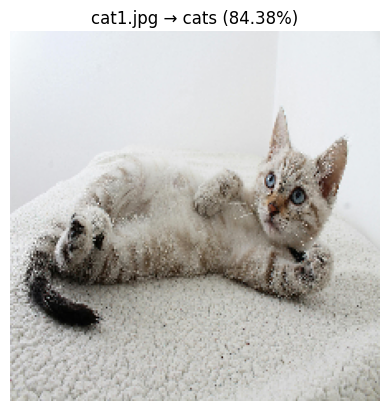

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


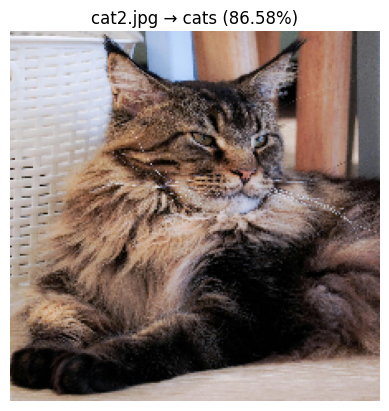

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


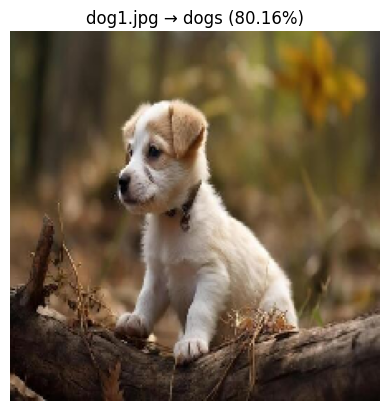

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


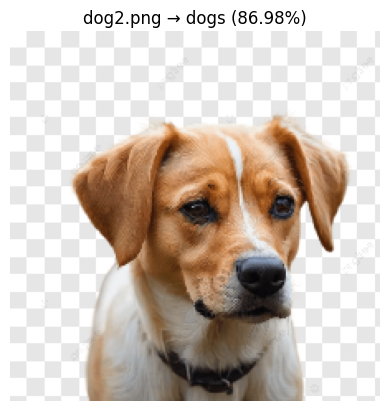

In [21]:

final_model = model_phase4

class_names = ['cats', 'dogs']

predict_images_from_folder(
    folder_path="realtest",
    model=final_model,
    class_names=class_names
)
